# Data Description

Ngày nay, vì vấn đề môi trường cũng như tạo sự thuận tiện trong di chuyển, dịch vụ cho thuê xe đạp đang ngày càng trở nên phổ biến ở các thành phố lớn, trong đó có Seoul. Một trong những điều quan trọng nhất trong dịch vụ này là đúng thời điểm, giúp giảm thiếu thời gian chờ đợi. Bên cạnh đó, việc cung cấp cho thành phố nguồn cung cấp xe đạp cho thuê ổn định cũng là một vấn đề cần quan tâm. Và để có nguồn cung cấp xe đạp cho thuê ổn định, chúng ta cần phải có được những dự đoán về số lượng xe đạp cần thiết mỗi giờ.

Bộ dữ liệu chứa thông tin liên quan đến thời tiết (Nhiệt độ, Độ ẩm, Tốc độ gió, Tầm nhìn, Điểm sương, Bức xạ mặt trời, Lượng tuyết rơi, Lượng mưa), số lượng xe đạp được thuê mỗi giờ và thông tin ngày tháng.

📌 **Attribute Information:**

* 📆  Date : year - month - day
* 🚲  Rented Bike count - Count of bikes rented at each hour (output attribute)
* 🕒  Hour - Hour of the day
* 🌡  Temperature - Temperature in Celsius
* 💧  Humidity - %
* 🌬️  Windspeed - m/s
* 👁️  Visibility - 10m
* 🌫️  Dew point temperature - Celsius
* ☀️  Solar radiation - MJ/m2
* 🌧️  Rainfall - mm
* ❄️  Snowfall - cm
* 🌸  Seasons - Winter, Spring, Summer, Autumn
* ⛱️  Holiday - Holiday/No holiday
* 🏬  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


📌 **Project Goal:** Phân tích dữ liệu và tạo mô hình đơn giản dự báo số lượng xe đạp được thuê.

# Table of Content

**1. Data Cleaning**
* *Importing Dataset*
* *Dataset Information*
* *Checking for unique values in all attribute*
* *Checking for missing values in each column*
* *Formatting*

**2. Exploratory Data Analysis (EDA)**
* *Heatmap*
* *Summary Statistics*
* *Bar Plot of each variable show label distribution of target variable*
* *Data Visualization*
    + Biểu đồ mô tả sự ảnh hưởng của từng nhân tố tới lượng thuê xe đạp
    + Biểu đồ mô tả mức độ tương quan của các nhân tố quan trọng đến số lượng thuê xe đạp
* *Remove Outliers*
    + Density Plot of Continuous Variables
    + Box plot for each continuous variables
    + Power Transformation
    + Density plot of each continuous variable after applying Power Transformer
    + Box plot of each continuous variable after applying Power Transformer

**3. Variance Inflation Factor**

**4. Feature Selection**

**5. Feature Importance Graph**

**6. Splitting our dataset into train and test set**

**7. Feature Scaling**

**8. Modeling**
* *K-fold Cross Validation*
* *Linear Regression*
* *Polynomial Regression*
* *Decision Tree Regression*
* *Random Forest Regression*
* *Bagging Regressor*
* *Stacking Regressor*
* *LGBMRegressor*

**9. Model Comparison**

**10. Training full dataset with LGBMRegressor**

# Data Cleaning

## Importing Libraries

In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df = pd.read_csv("..\Bikecycle\SeoulBikeData.csv", encoding='unicode_escape', parse_dates=[0])
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Có thể thấy rằng:
+ Có 4 đặc điểm thuộc kiểu dữ liệu **integer**  
+ Có 6 đặc điểm thuộc kiểu dữ liệu **float**  
+ Có 4 đặc điểm thuộc kiểu dữ liệu **object**

In [4]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [5]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

## Checking for unique values in all attribute

In [6]:
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

## Checking for missing values in each column

In [7]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

## Formatting

In [8]:
df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Exploratory Data Analysis (EDA)

## Heatmap

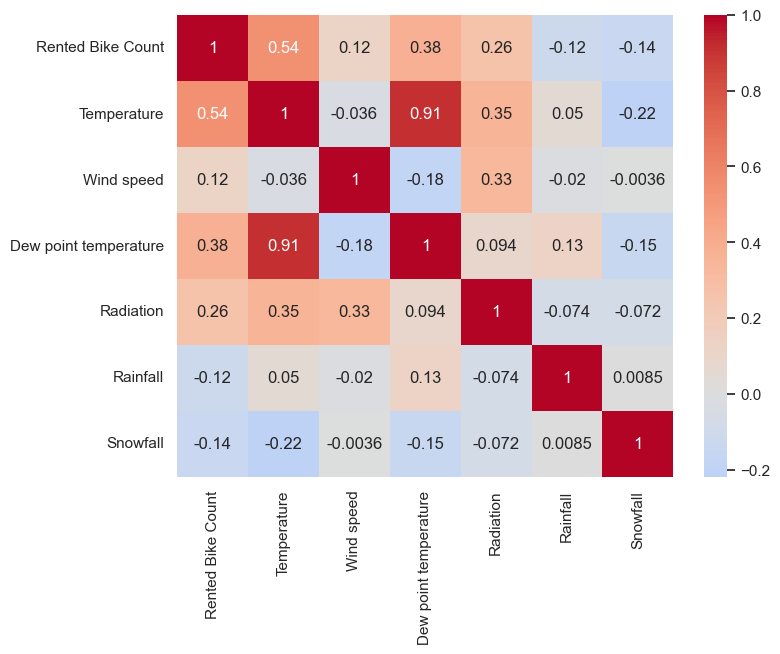

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float']).corr(),cmap='coolwarm', annot=True,center = 0)
plt.show()

## Summary Statistics

#### Thông tin tóm tắt về các thống kê mô tả khác nhau

In [10]:
df.describe()

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


**Nhận xét**: 
- 3 biến **Radiation, Rainfall, Snowfall** có mean thấp, phân vị 25th, 50th gần như xấp xỉ 0.
- Nhiệt độ trung bình khoảng 13 độ C, với biên độ dao động từ -17 đến 40 độ C trong năm. Cùng với các yếu tố mưa và tuyết có thể cho thấy dữ liệu được thu thập tại miền lục địa phía Bắc Hàn Quốc (Seoul) chính xác với thực tế sở hữu mùa đông lạnh giá và mùa hè nóng ẩm.

## Bar Plot of each variable show label distribution of target variable

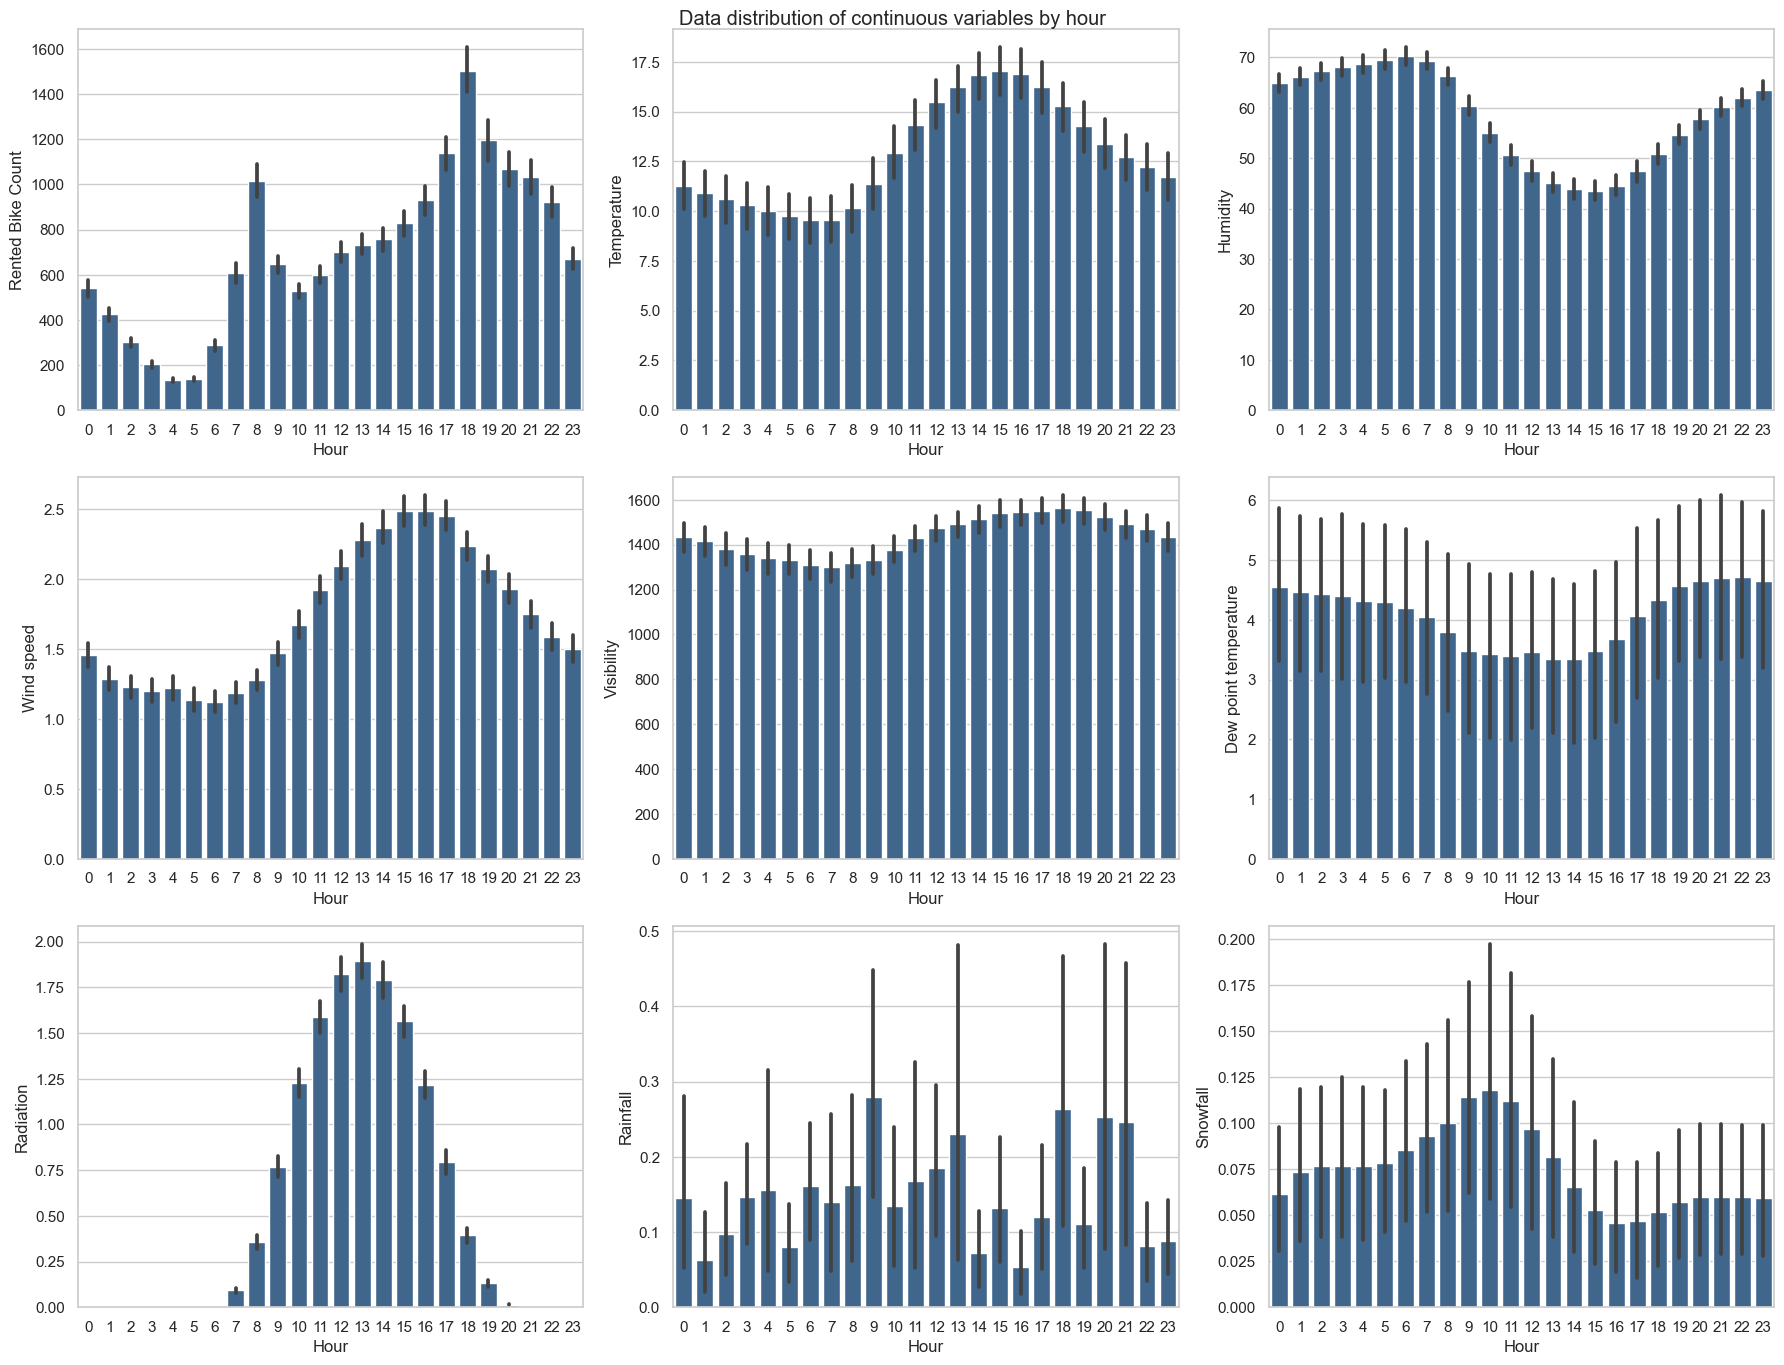

In [11]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax, color='#336699')
plt.suptitle('Data distribution of continuous variables by hour')
plt.tight_layout()

**Nhận xét:** Lượng thuê xe cao điểm vào 18h, đây cũng là lúc sau thời điểm nhiệt độ cao nhất trong ngày, lúc này nhiệt độ đã giảm và trời đã hết nắng gắt (Solar Radiation thấp) nên có thể dự đoán rằng đây là lúc thời tiết mát mẻ và dễ chịu nên số lượng thuê xe cao nhất trong ngày

## Data Visualization

### Biểu đồ mô tả sự ảnh hưởng của từng nhân tố tới lượng thuê xe đạp

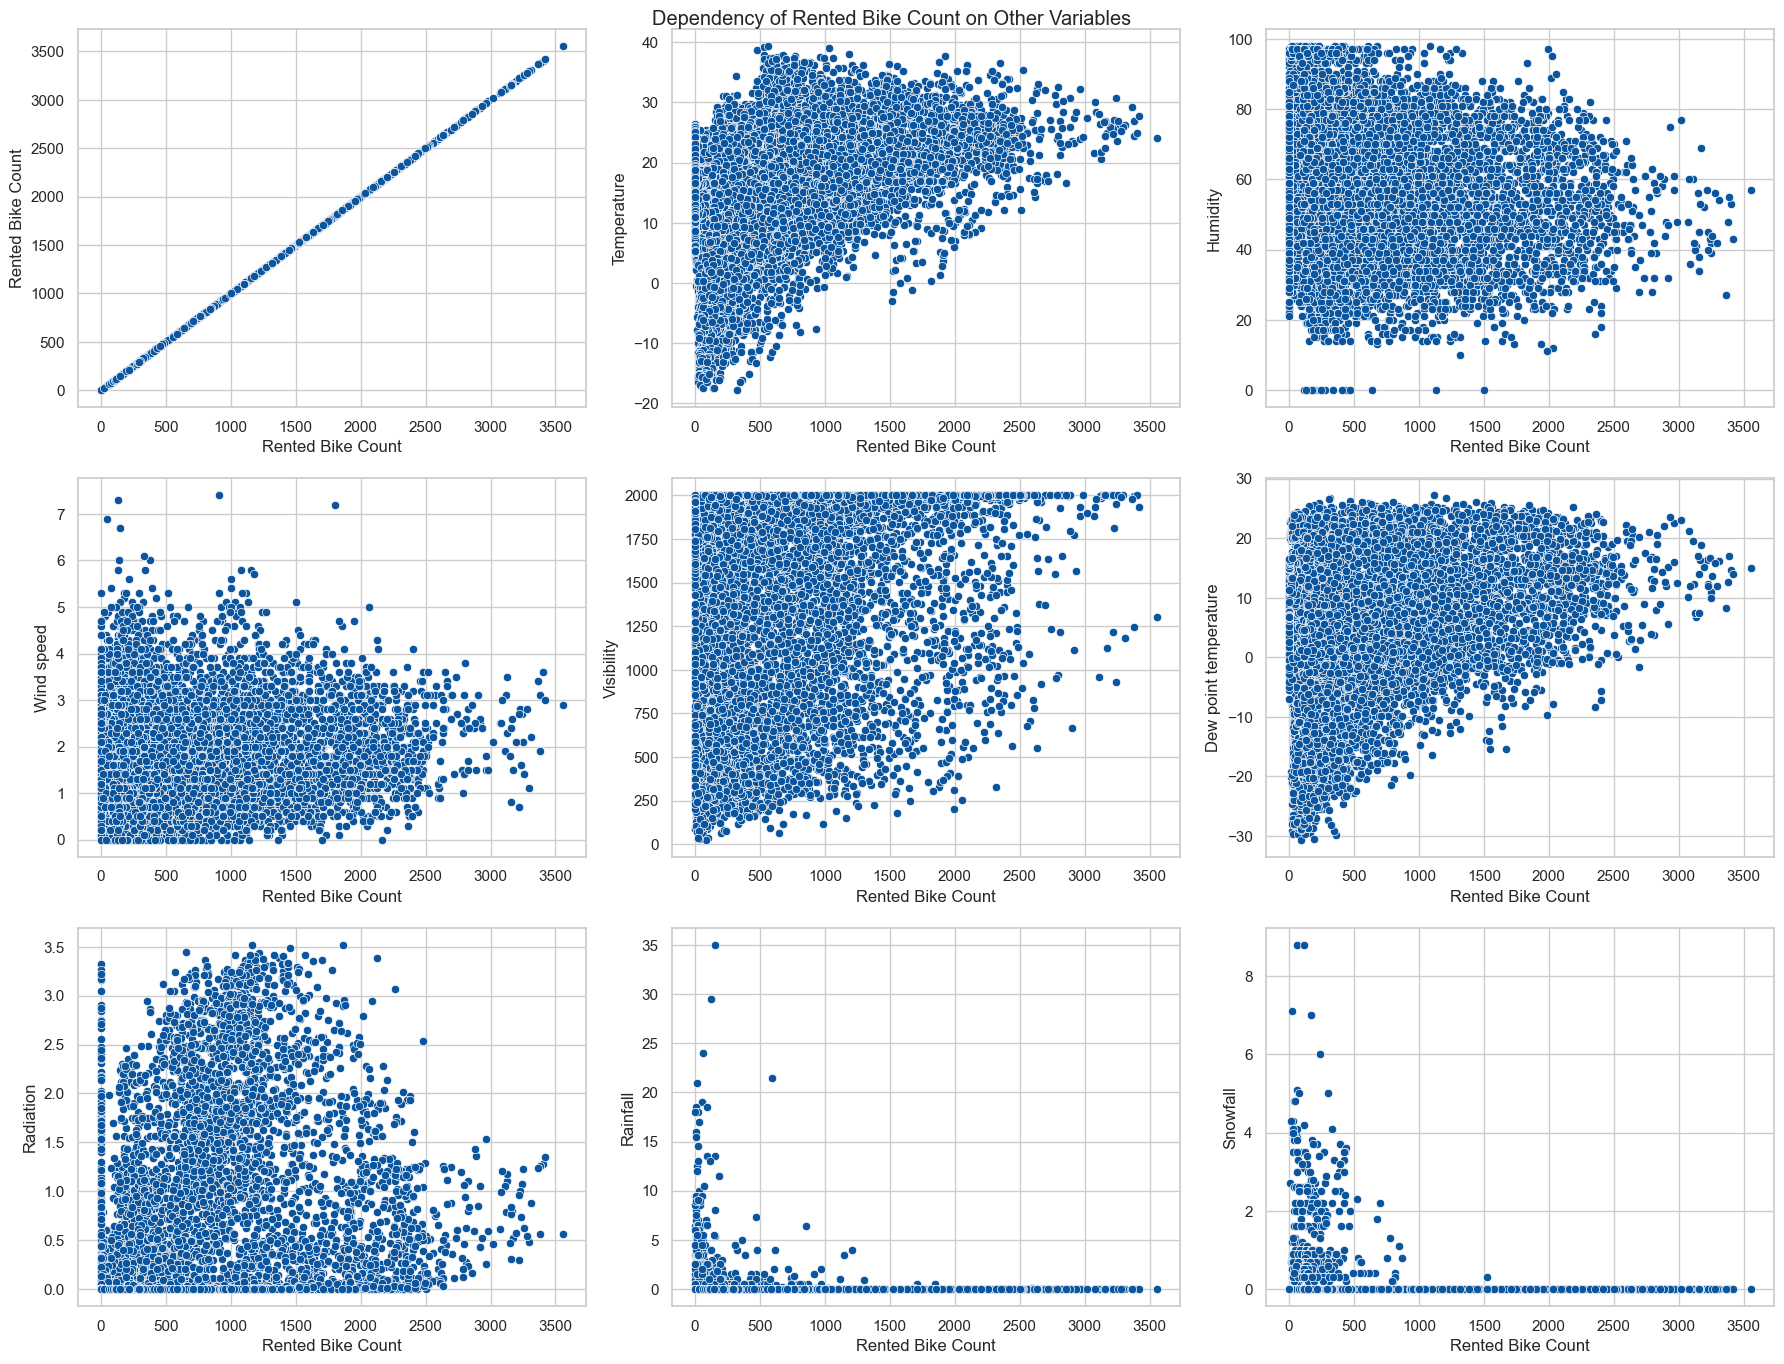

In [12]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int']).columns):
    ax = plt.subplot(4, 3, i+1)
    ax.set_facecolor('white')  
    sns.scatterplot(data=df, x='Rented Bike Count', y=col, ax=ax)
plt.suptitle('Dependency of Rented Bike Count on Other Variables')
plt.tight_layout()

**Nhận xét**: Dựa trên các biểu đồ scatterplot trên, có thể thấy rằng nhiệt độ và lượng tia tử ngoại có mức độ tương quan tương đối cao với số lượng thuê xe đạp, rõ ràng nhất là biến nhiệt độ. 
- Nhiệt độ (Temperature), Bức xạ mặt trời (Radiation) Biểu đồ cho thấy một mối tương quan dương giữa nhiệt độ và số lượng xe thuê. Khi nhiệt độ tăng, số lượng xe thuê cũng tăng. Điều này có thể cho thấy rằng trong điều kiện thời tiết ấm áp hơn, người dân có xu hướng sử dụng xe thuê nhiều hơn.
- Độ ẩm (Humidity), Tốc độ gió (Wind speed), Tầm nhìn (Visibility) và Điểm sương (Dew point temperature) biểu đồ cũng cho thấy mối tương quan với lượng xe thuê tuy nhiên chưa quá rõ ràng. Các giá trị khác nhau không có ảnh hưởng đáng kể đến số lượng xe thuê
- Trong khi đó, lượng mưa (Rainfall) và tuyết (Snowfall) không thể hiện ảnh hưởng rõ ràng chứng tỏ biến ít ảnh hưởng đến số lượng thuê xe đạp theo mối quan hệ tuyến tính.

**Mô tả sự ảnh hưởng của nhiệt độ đến số lượng thuê xe đạp**

Text(0.5, 1.0, 'Rented Bike Count of Temperature')

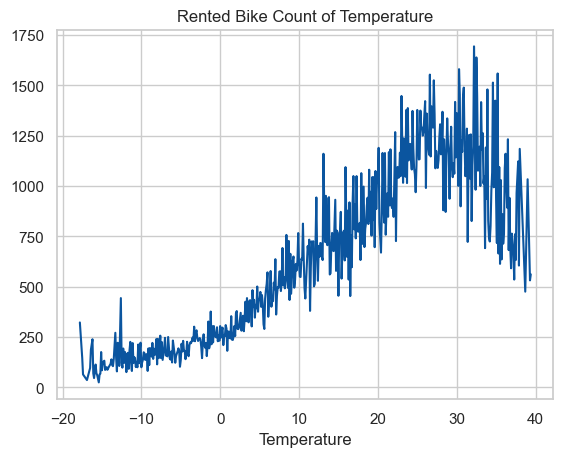

In [13]:
df.groupby('Temperature')['Rented Bike Count'].mean().plot.line()
plt.title('Rented Bike Count of Temperature')

**Nhận xét:** số lượng xe được thuê tăng khi nhiệt độ tăng đạt đỉnh ở khoảng 25-30 độ C. Đây là mức nhiệt độ dễ chịu và mát mẻ nên mọi người có xu hướng thuê xe đạp cao và mong muốn thỏa mãn nhu cầu đi dạo, đi chơi... Tuy nhiên, khi nhiệt độ quá cao (30-40 độ C) hoặc quá thấp (-20-10 độ C) thì lượng thuê xe đạp giảm do thời tiết quá nóng hoặc quá lạnh nên mọi người không có nhu cầu ra ngoài

**Mô tả sự ảnh hưởng của thời tiết đến số lượng thuê xe đạp**

Từ biểu đồ dưới cho thấy số lượng dữ liệu tương đối đồng đều, được thu thập đủ trong 4 mùa

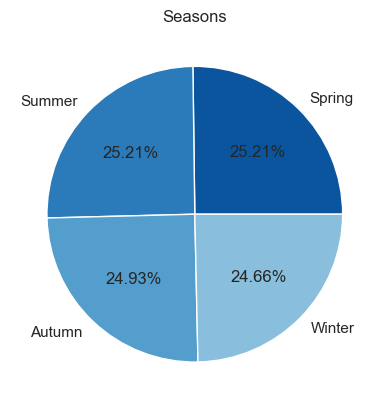

In [14]:
season_var = df['Seasons'].value_counts().to_frame()
plt.pie(season_var['count'],labels=season_var['count'].index,autopct='%.2f%%')
plt.title('Seasons')
plt.show()

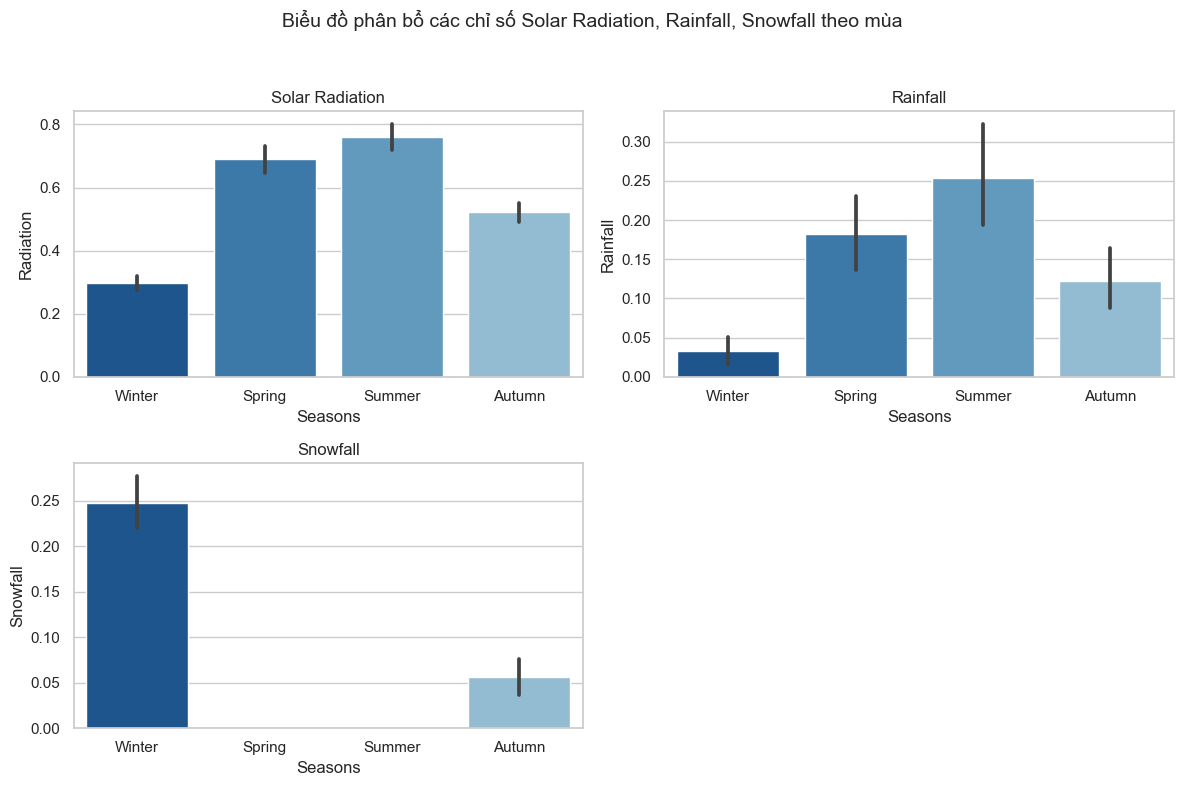

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(data=df, x='Seasons', y='Radiation', ax=axes[0, 0])
axes[0, 0].set_title('Solar Radiation')
sns.barplot(data=df, x='Seasons', y='Rainfall', ax=axes[0, 1])
axes[0, 1].set_title('Rainfall')
sns.barplot(data=df, x='Seasons', y='Snowfall', ax=axes[1, 0])
axes[1, 0].set_title('Snowfall')
fig.delaxes(axes[1, 1])
fig.suptitle('Biểu đồ phân bổ các chỉ số Solar Radiation, Rainfall, Snowfall theo mùa', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])

**Nhận xét:** Dựa vào biểu đồ, có thể thấy tại Seoul:
1. **Lượng bức xạ mặt trời** tăng cao nhất vào mùa hạ, ở mức trung bình trong mùa xuân và mùa thu, và thấp nhất vào mùa đông.
2. **Lượng mưa** thường ít vào mùa đông và mùa thu, đạt cao nhất vào mùa hạ và có mức độ trung bình vào mùa xuân.
3. **Lượng tuyết** chỉ xuất hiện đáng kể trong mùa đông, trong khi các mùa khác có ít hoặc không có tuyết.

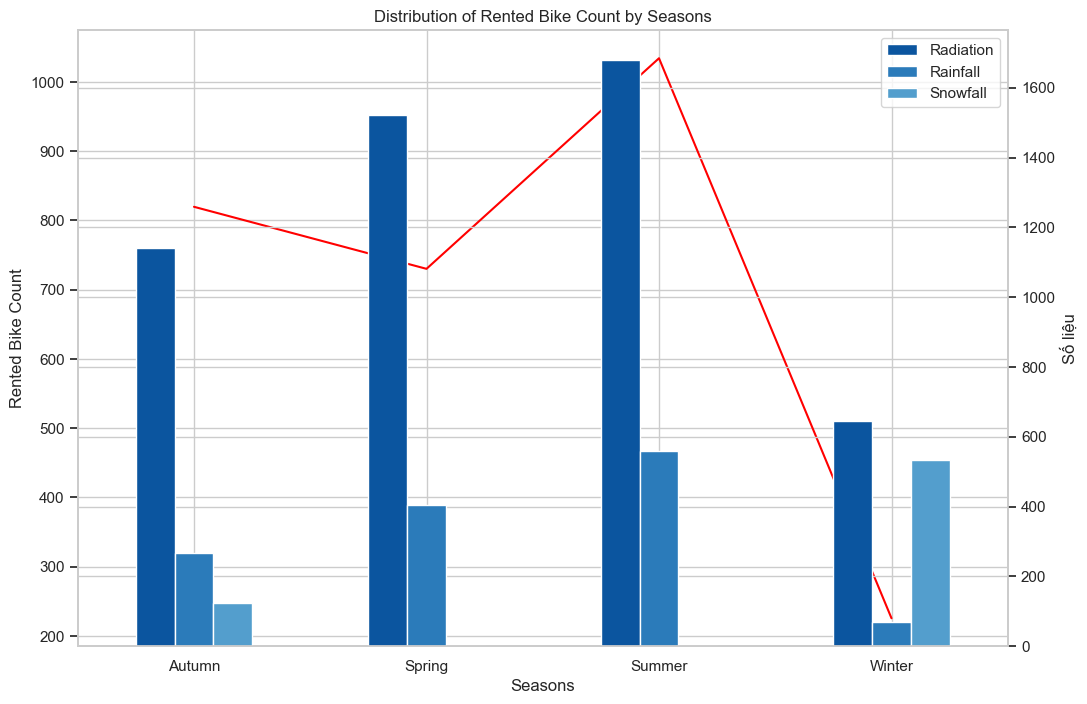

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 8))

df.groupby('Seasons')['Rented Bike Count'].mean().plot.line(color='red', ax=ax1)
ax2 = ax1.twinx()
df[['Seasons', 'Radiation', 'Rainfall', 'Snowfall']].groupby('Seasons').sum().plot(kind='bar', ax=ax2)

ax1.set_ylabel('Rented Bike Count')
ax2.set_ylabel('Số liệu')
ax2.legend(['Radiation', 'Rainfall', 'Snowfall'])
plt.title('Distribution of Rented Bike Count by Seasons')
plt.show()

**Nhận xét:** Từ biểu đồ có thể thấy, lượng xe đạp được thuê tăng cao vào mùa hạ và giảm vào mùa đông. Điều này có thể được giải thích bởi các yếu tố sau:
1. **Thời tiết:** Mùa hạ thường có thời tiết ấm áp và nắng nên người ta có xu hướng muốn sử dụng xe đạp để di chuyển trong thời gian này. Trái lại, mùa đông có thời tiết lạnh và có thể có tuyết, điều này làm giảm sự sử dụng xe đạp.
2. **Hoạt động ngoài trời:** Mùa hè thường là thời gian để tham gia các hoạt động ngoài trời như du lịch, đi picnic hoặc thể thao. Sử dụng xe đạp là một cách tiện lợi để di chuyển trong các hoạt động này. Trong khi đó, trong mùa đông, hoạt động ngoài trời thường giảm do điều kiện thời tiết khắc nghiệt.

**Mô tả sự ảnh hưởng của ngày làm việc/ngày nghỉ đến số lượng thuê xe đạp**

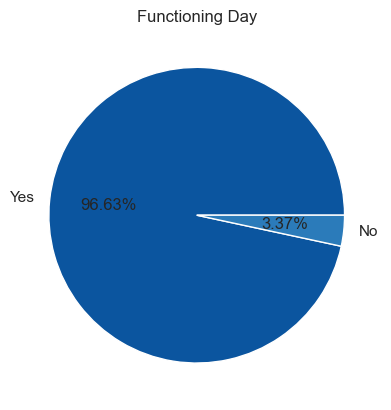

In [17]:
Functioning_Day_var = df['Functioning Day'].value_counts().to_frame()

plt.pie(Functioning_Day_var['count'],labels=Functioning_Day_var['count'].index,autopct='%.2f%%')
plt.title('Functioning Day')
plt.show()

Kiểm tra lượng xe đạp được thuê vào vào ngày làm việc và ngày nghỉ qua biểu đồ dưới, có thể thấy toàn bộ xe đều được thuê vào ngày làm việc, lượng thuê vào ngày nghỉ bằng 0 cho thấy xe chỉ được thuê vào các ngày chức năng (Functional Day) .

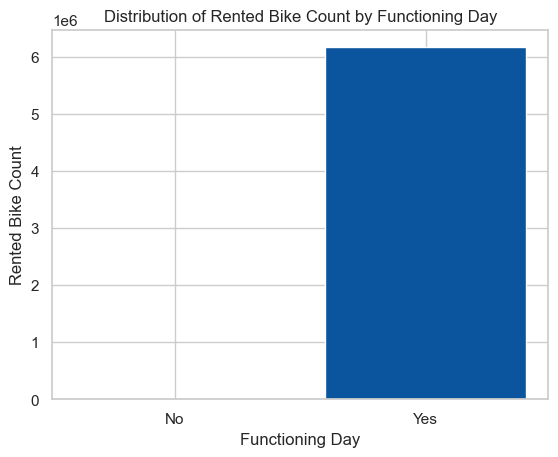

In [18]:
functioning_day_counts = df.groupby("Functioning Day")["Rented Bike Count"].sum()

plt.bar(functioning_day_counts.index, functioning_day_counts.values)
plt.xlabel("Functioning Day")
plt.ylabel("Rented Bike Count")
plt.title("Distribution of Rented Bike Count by Functioning Day")
plt.show()

**Mô tả sự ảnh hưởng của ngày thường/ngày lễ đến số lượng thuê xe đạp**

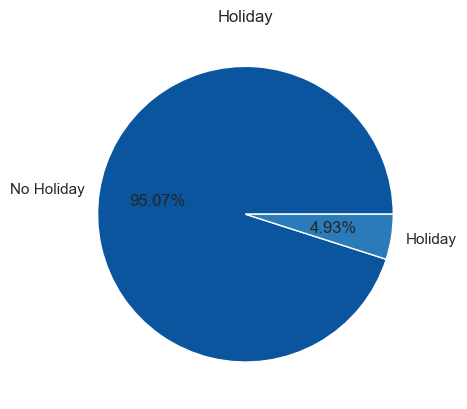

In [19]:
holiday_var = df['Holiday'].value_counts().to_frame()

plt.pie(holiday_var['count'],labels=holiday_var['count'].index,autopct='%.2f%%')
plt.title('Holiday')
plt.show()

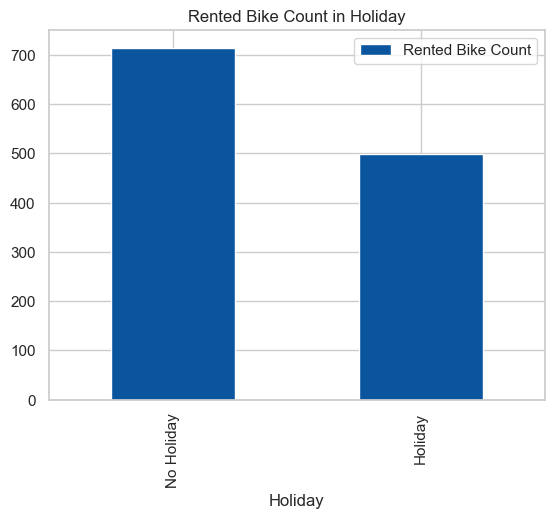

In [20]:
holiday1 = pd.DataFrame(df.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending=False))
holiday1.plot.bar()
plt.title('Rented Bike Count in Holiday')
plt.show()

**Nhận xét**: Lượng thuê xe ngày thường cao hơn ngày nghỉ lễ có thể được giải thích bằng một số nguyên nhân sau:
1. Trong ngày thường, nhiều người phải đi làm, học tập hoặc hoạt động hàng ngày khác, và việc thuê xe có thể là một phương tiện tiện lợi và nhanh chóng để di chuyển trong thành phố.
2. Mọi người có thể không thích ra ngoài vào ngày lễ mà muốn dành thời gian ở nhà nghỉ ngơi, ở bên cạnh bạn bè, người thân.

## Remove Outliers

### Density Plot of Continuous Variables

#### Skewness distribution

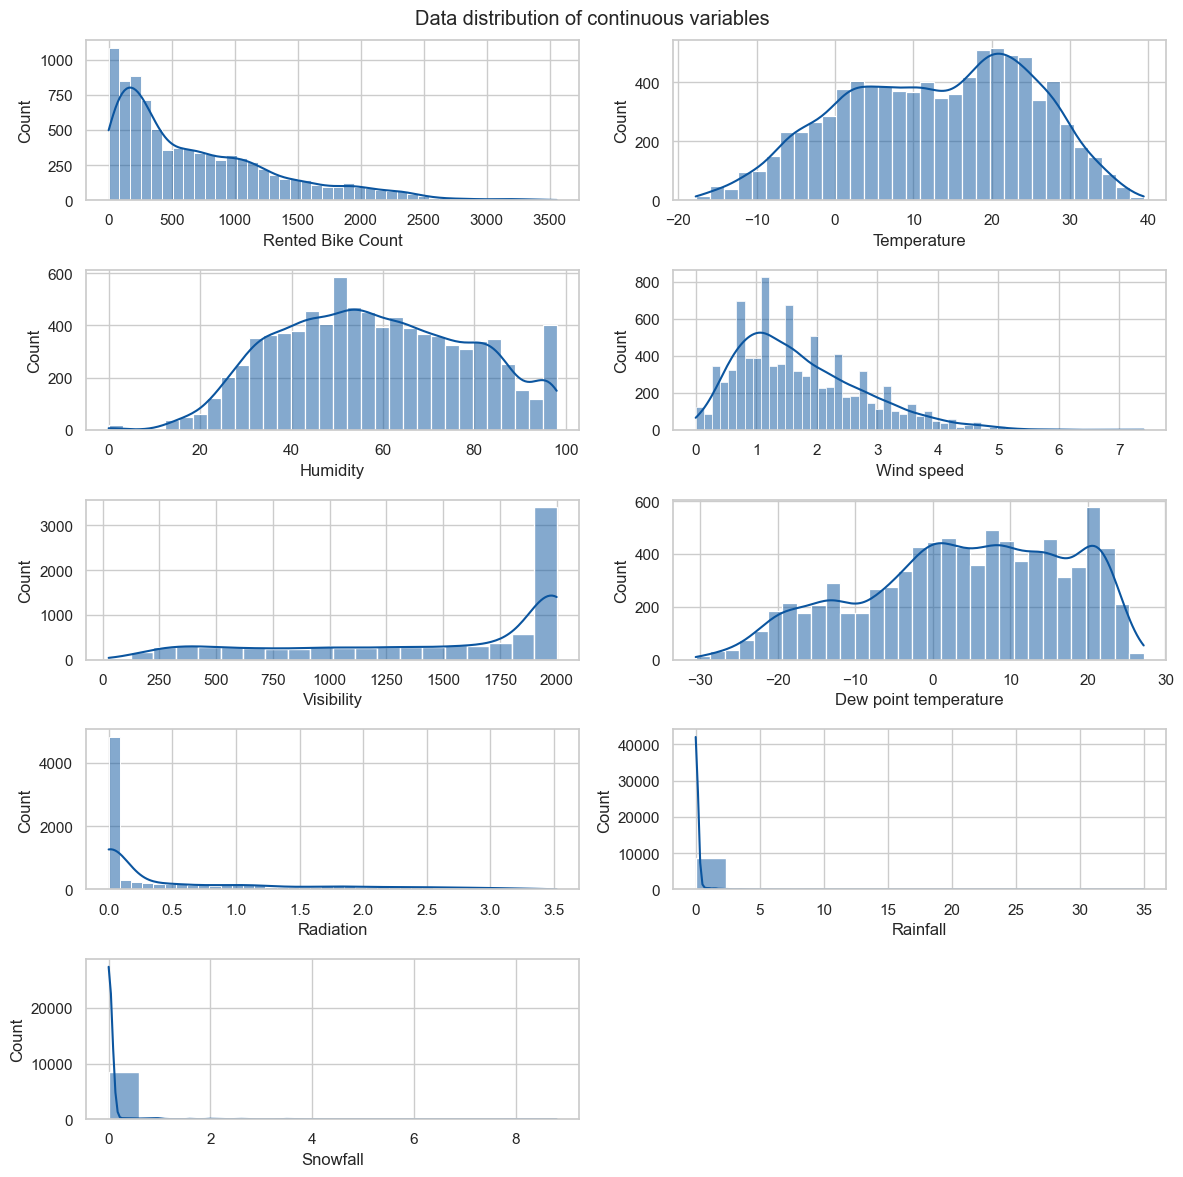

In [21]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Từ biểu đồ trên, chúng ta có thể thấy rằng có rất nhiều thuộc tính có phân phối lệch (dương hoặc âm).

### Box plot for each continuous variables

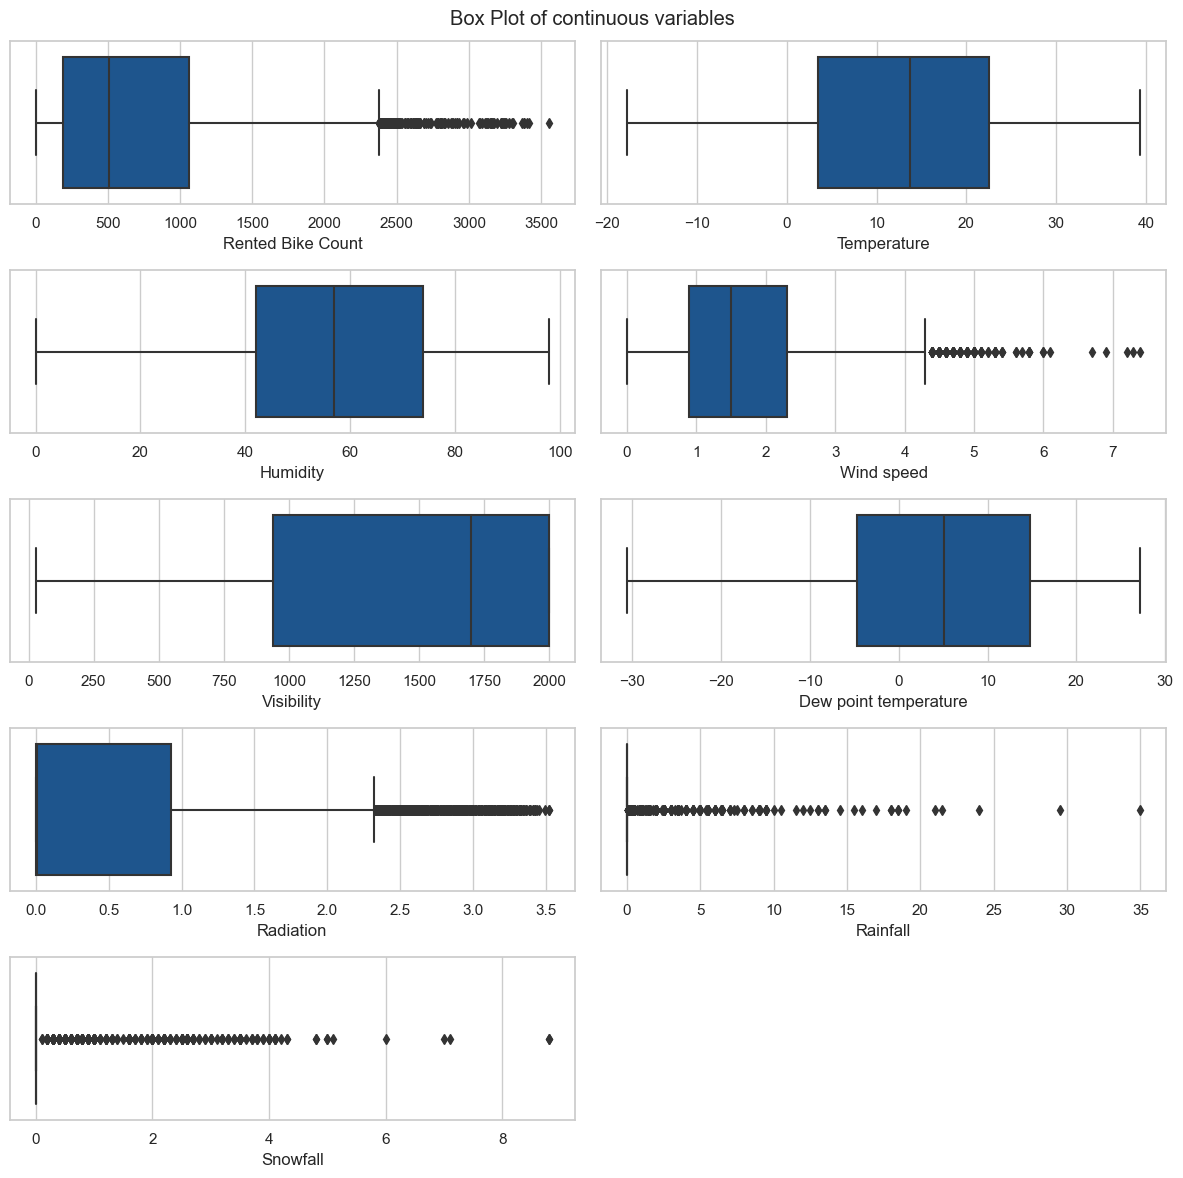

In [22]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax)
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Power Transformation

In [23]:
# chọn các biến thuộc kiểu dữ liệu float và int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [24]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

### Density plot of each continuous variable after applying Power Transformer

Bây giờ, các biểu đồ phân phối trông đối xứng hơn sau khi áp dụng Power Transformer.

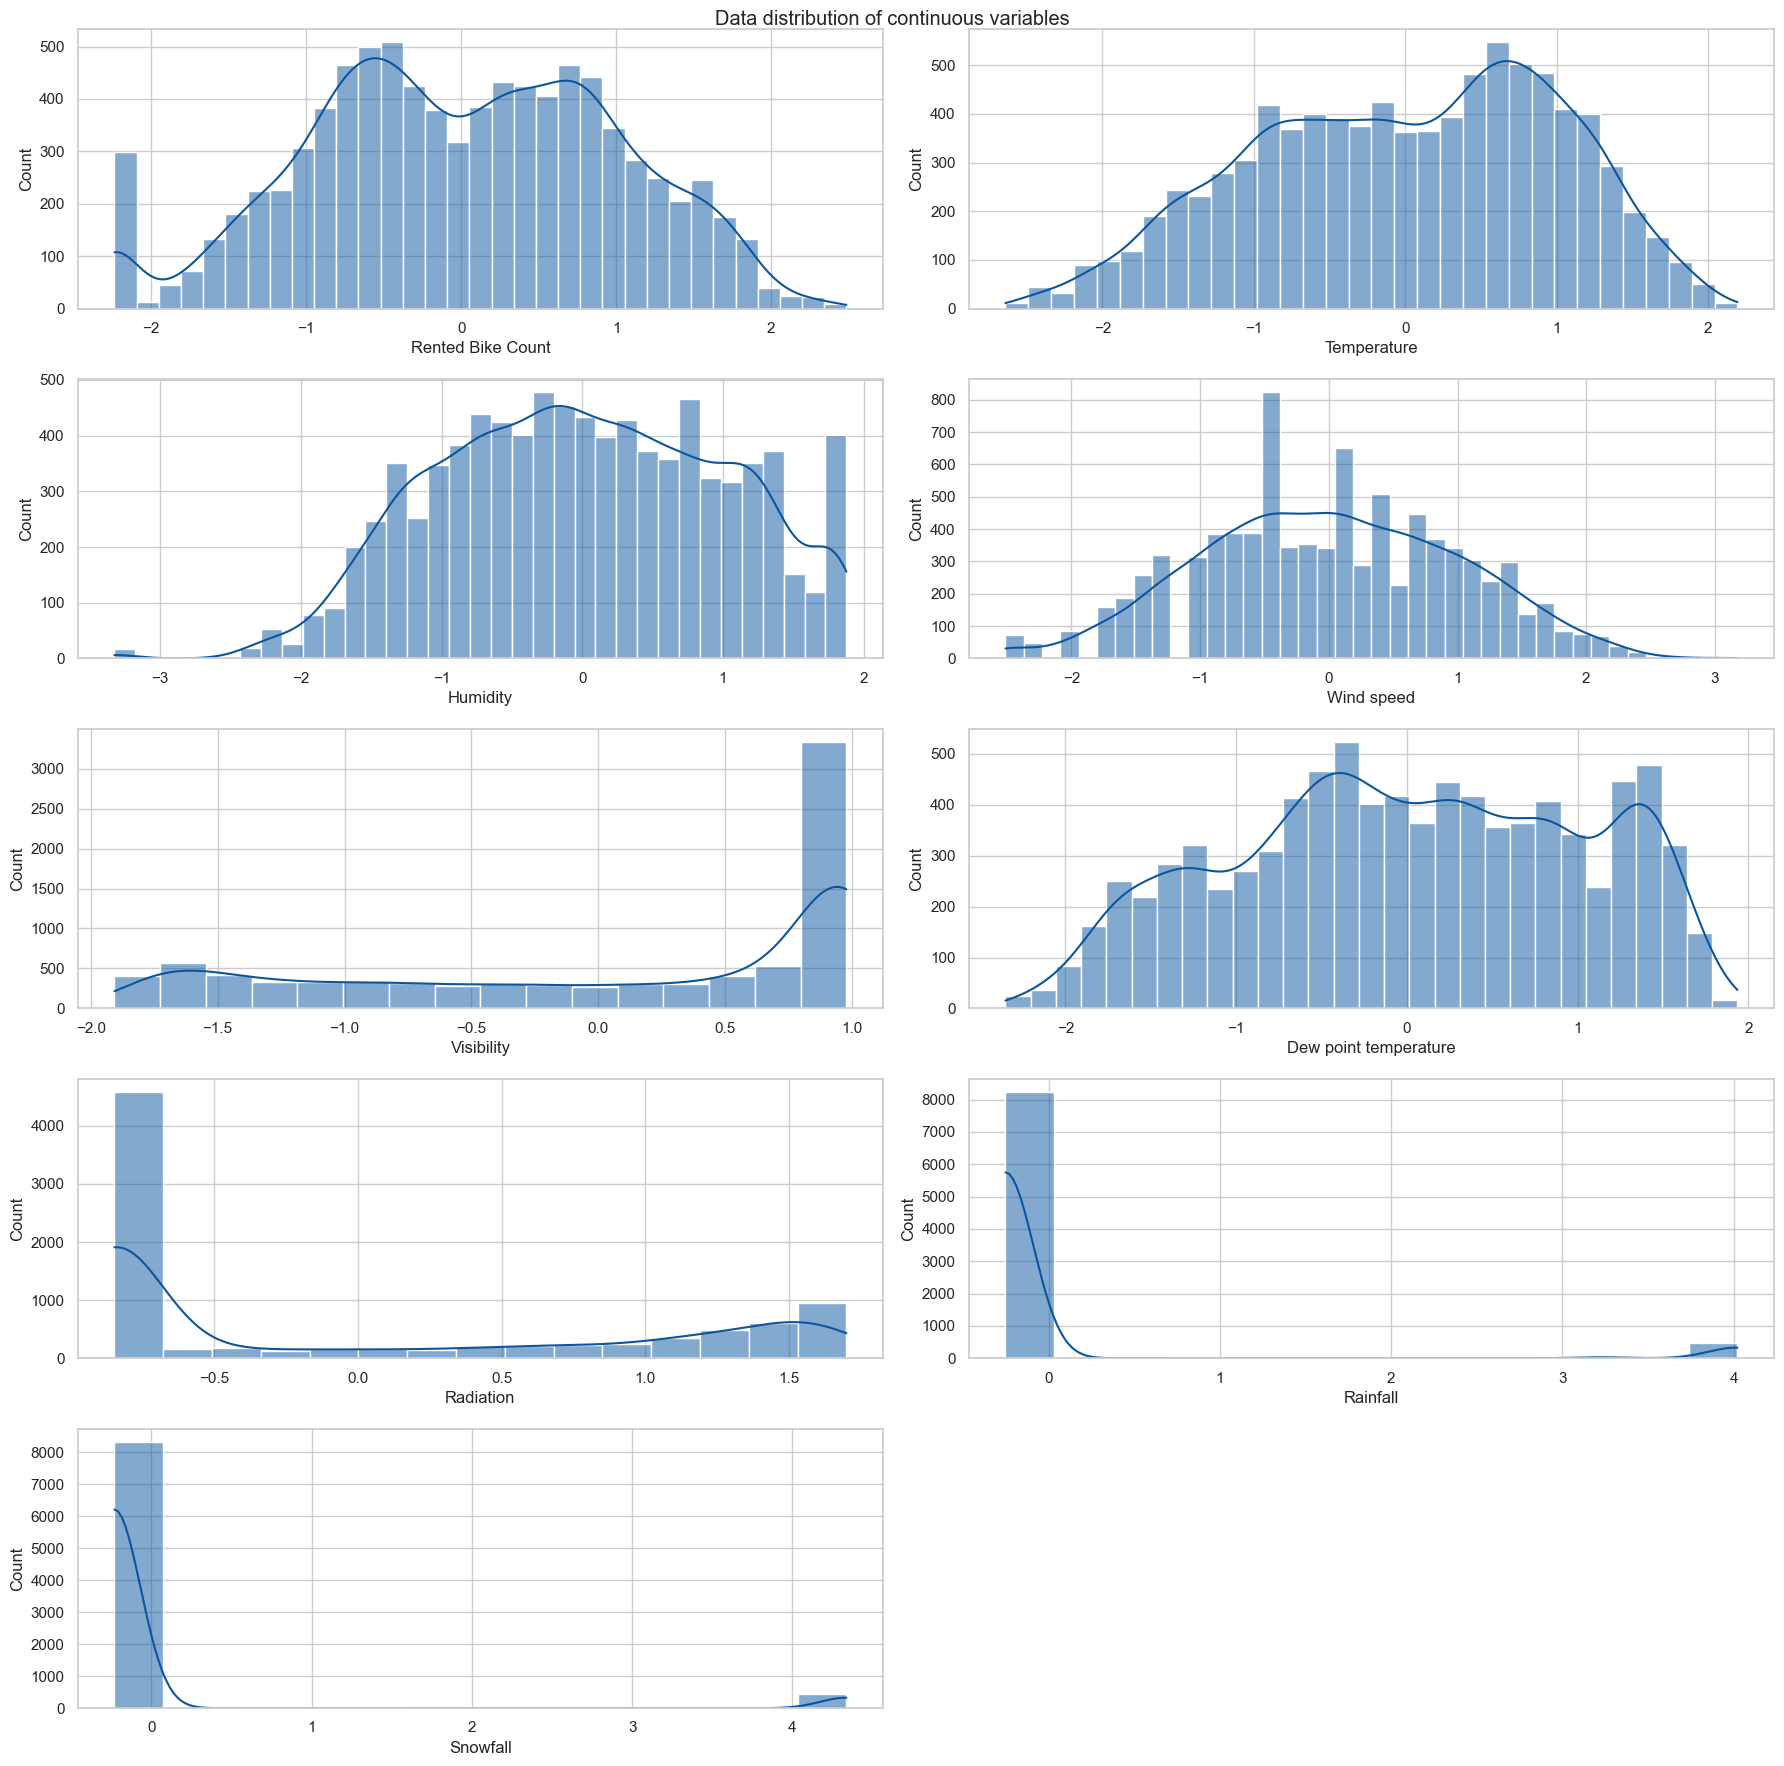

In [25]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box plot of each continuous variable after applying Power Transformer

Bây giờ, các biểu đồ hộp trông cân đối hơn sau khi xử lý các giá trị ngoại lai.

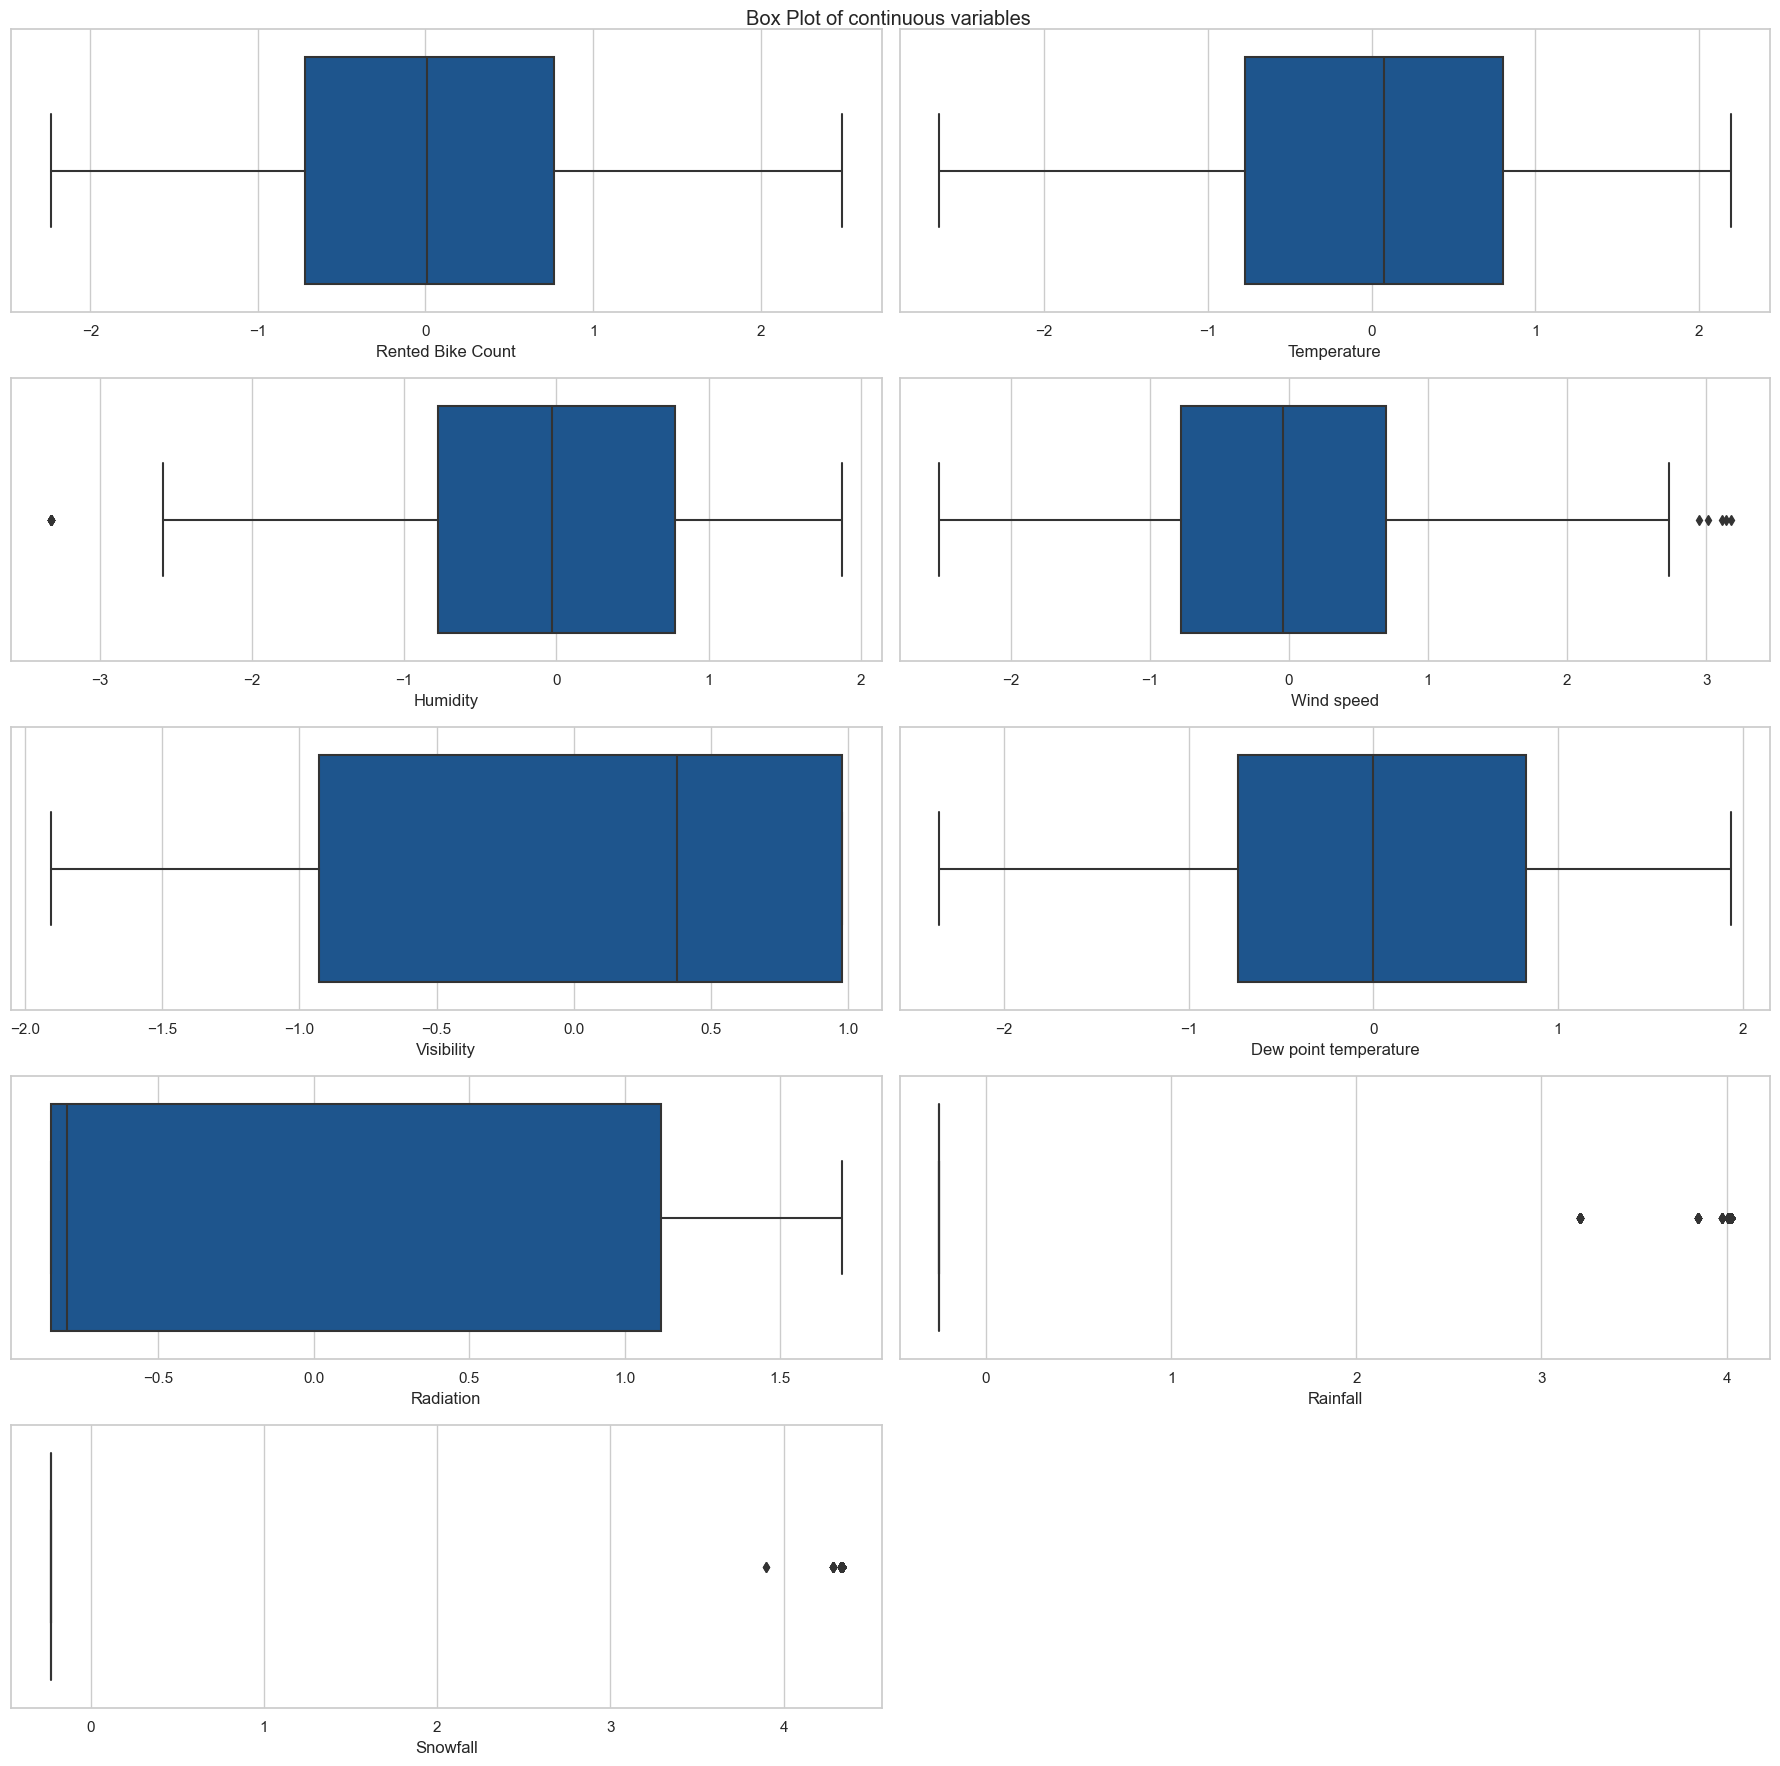

In [26]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax)
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

# Variance Inflation Factor

**Sử dụng Onehot Encoder đối với các biến phân loại**

In [27]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
columns_to_onehot_encode = ['Seasons', 'Holiday', 'Functioning Day', 'Hour']

for column in columns_to_onehot_encode:
    new_col = pd.DataFrame(onehot.fit_transform(df[[column]]).toarray(), columns = onehot.get_feature_names_out())
    df.drop(column, axis = 1, inplace = True)
    df = df.join(new_col)

In [28]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
calc_vif(X.iloc[:, :8])

,variables,VIF
0,Temperature,45.786458
1,Humidity,12.009217
2,Wind speed,1.232661
3,Visibility,1.559788
4,Dew point temperature,60.274115
5,Radiation,1.858131
6,Rainfall,1.195148
7,Snowfall,1.166736


Biến Dew Point Temperature có hệ số VIF rất cao, có thể dẫn đến hiện tượng đa cộng tuyến. Cần xóa biến này để giúp mô hình bớt cồng kềnh.

In [31]:
del X['Dew point temperature']
calc_vif(X.iloc[:, :8])

,variables,VIF
0,Temperature,1.561961
1,Humidity,2.448733
2,Wind speed,1.246818
3,Visibility,1.523162
4,Radiation,1.828715
5,Rainfall,1.195884
6,Snowfall,1.164414
7,Seasons_Autumn,1.037284


Giờ đây, các hệ số VIF đã trong khoảng từ 1 đến 5.

# Feature Selection

Trong tập dữ liệu trên có biến đầu vào bằng số và biến đầu ra bằng số sau khi đã encode vì vậy sử dụng Pearson để lựa chọn tính năng đặc trưng.

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [33]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x00000215AF3C4400>)

In [34]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

## Feature Importance Graph

Temperature : 21.10%
Humidity : 3.07%
Wind speed : 1.01%
Visibility : 2.12%
Radiation : 7.45%
Rainfall : 4.93%
Snowfall : 2.31%
Seasons_Autumn : 0.23%
Seasons_Spring : 0.06%
Seasons_Summer : 6.06%
Seasons_Winter : 11.37%
Holiday_Holiday : 0.46%
Holiday_No Holiday : 0.46%
Functioning Day_No : 12.06%
Functioning Day_Yes : 12.06%
Hour_0 : 0.04%
Hour_1 : 0.24%
Hour_2 : 0.80%
Hour_3 : 1.70%
Hour_4 : 2.84%
Hour_5 : 2.72%
Hour_6 : 1.01%
Hour_7 : 0.02%
Hour_8 : 0.41%
Hour_9 : 0.00%
Hour_10 : 0.05%
Hour_11 : 0.00%
Hour_12 : 0.03%
Hour_13 : 0.07%
Hour_14 : 0.09%
Hour_15 : 0.18%
Hour_16 : 0.34%
Hour_17 : 0.81%
Hour_18 : 1.90%
Hour_19 : 0.84%
Hour_20 : 0.48%
Hour_21 : 0.43%
Hour_22 : 0.25%
Hour_23 : 0.00%


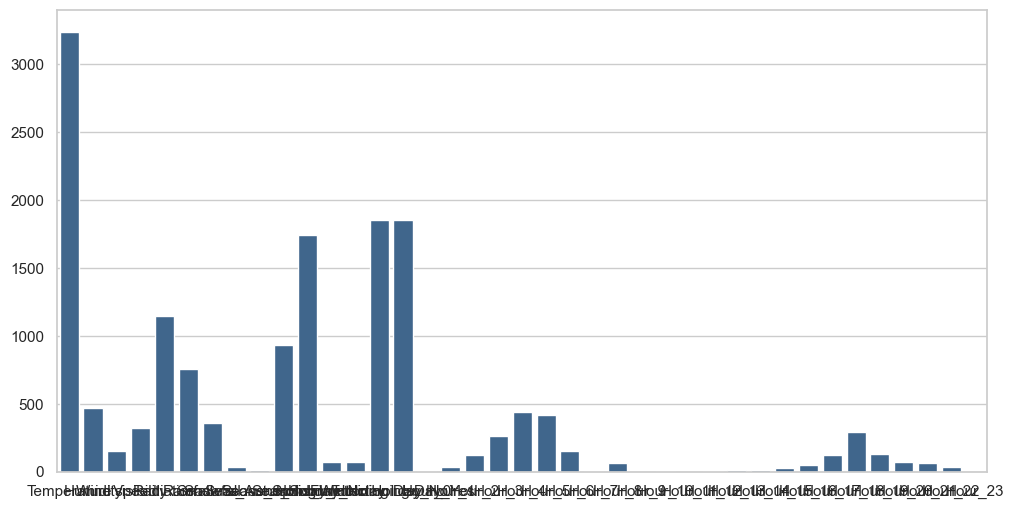

In [35]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_, color='#336699')
plt.show()

Từ biểu đồ cột ở trên có thể thấy tầm quan trọng của một số tính năng và sẽ chỉ dùnglấy những tính năng quan trọng hơn trong việc xây dựng mô hình dự báo.

# Splitting our dataset into train and test set 

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1543)

# Feature Scaling

## Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Modeling

### Performance Measures for Regression (Các thước đo hiệu suất hồi quy)

### K-fold Cross Validation

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [39]:
# Tạo từ điển để lưu trữ độ chính xác của các mô hình khác nhau
model_comparison={}

## Linear Regression

In [40]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.71%
Model MSE : 19.08%
Cross Val Accuracy: 80.37 %
Cross Val Standard Deviation: 0.47 %


### Linear Regression Summary

In [41]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              728.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:26:59   Log-Likelihood:                         -3672.1
No. Observations:                6132   AIC:                                      7414.
Df Residuals:                    6097   BIC:                                      7649.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3509      0.013     26.455      0.000       0.325       0.377
x2            -0.1104      0.009    -11.643      0.000      -0.129      -0.092
x3            -0.0186      0.007     -2.757      0.006      -0.032      -0.005
x4             0.0172      0.007      2.384      0.017       0.003       0.031
x5             0.2273      0.017     13.446      0.000       0.194       0.260
x6            -0.2486      0.006    -39.424      0.000      -0.261      -0.236
x7             0.0007      0.006      0.120      0.905      -0.011       0.013
x8             0.1212      0.005     26.623      0.000       0.112       0.130
x9             0.0166      0.005      3.683      0.000       0.008       0.025
x10            0.0241      0.008      3.146      0.002       0.009       0.039
x11           -0.1623      0.008    -19.443      0.000      -0.179      -0.146
x12           -0.0231      0.003     -8.083      0.000      -0.029      -0.017
x13            0.0231      0.003      8.083      0.000       0.017       0.029
x14           -0.2383      0.003    -81.234      0.000      -0.244      -0.233
x15            0.2383      0.003     81.234      0.000       0.233       0.244
x16            0.0352      0.006      5.880      0.000       0.023       0.047
x17           -0.0061      0.006     -1.008      0.313      -0.018       0.006
x18           -0.0502      0.006     -8.363      0.000      -0.062      -0.038
x19           -0.0896      0.006    -15.002      0.000      -0.101      -0.078
x20           -0.1444      0.006    -24.064      0.000      -0.156      -0.133
x21           -0.1395      0.006    -23.211      0.000      -0.151      -0.128
x22           -0.0473      0.006     -7.993      0.000      -0.059      -0.036
x23            0.0321      0.006      5.686      0.000       0.021       0.043
x24            0.0905      0.006     16.276      0.000       0.080       0.101
x25           -0.0063      0.006     -1.057      0.291      -0.018       0.005
x26           -0.0797      0.006    -12.348      0.000      -0.092      -0.067
x27           -0.0827      0.007    -12.446      0.000      -0.096      -0.070
x28           -0.0610      0.007     -8.991      0.000      -0.074      -0.048
x29           -0.0622      0.007     -9.259      0.000      -0.075      -0.049
x30           -0.0615      0.007     -9.156      0.000      -0.075      -0.048
x31           -0.0360      0.007     -5.525      0.000      -0.049      -0.023
x32           -0.0126      0.006     -2.037      0.042      -0.025      -0.000
x33            0.0475      0.006      8.047      0.000       0.036       0.059
x34            0.1487      0.005     27.043      0.000       0.138       0.159
x35            0.1249      0.006     21.930      0.000       

**R-squared (R²)**: Đo lường cho mức độ phù hợp của mô hình. Trong trường hợp này, R-squared (uncentered) là 0.807 và Adj. R-squared (uncentered) là 0.806, có nghĩa là mô hình giải thích được khoảng 80.6% (uncentered) hoặc 80.5% (centered) sự biến thiên của biến phụ thuộc "Rented Bike Count".\
**F-statistic**: Giá trị của thống kê F được sử dụng để kiểm tra tính chính xác của mô hình hồi quy. Trong trường hợp này, giá trị F-statistic là 728.4 và p-value (Prob (F-statistic)) là 0.00, cho thấy mô hình có hiệu quả và ý nghĩa thống kê.\
**Log-Likelihood**: Giá trị hàm log hợp lý của mô hình. Giá trị càng cao thể hiện mô hình càng phù hợp với dữ liệu. Trong trường hợp này, giá trị Log-Likelihood là -3672.1.\
**AIC và BIC**: AIC (Akaike Information Criterion) và BIC (Bayesian Information Criterion) là hai phép đo sử dụng để so sánh các mô hình thay thế. Khi so sánh các mô hình, giá trị AIC hoặc BIC thấp nhất cho thấy mô hình tốt hơn. Trong trường hợp này, AIC là 7414 và BIC là 7649.\
**Coefficients**: Các hệ số ước lượng của mô hình hồi quy tuyến tính. Mỗi hệ số ước lượng được gán cho một biến độc lập (x1, x2,..., x37). Các thông số bao gồm: giá trị của hệ số (coef), sai số chuẩn của hệ số (std err), giá trị t-statistic (t), p-value (P>|t|), và khoảng tin cậy 95% (0.025, 0.975). Các hệ số này cho biết mức độ ảnh hưởng của mỗi biến độc lập đến biến phụ thuộc.\
**Omnibus, Jarque-Bera, Skew, Kurtosis**: Các thống kê kiểm tra giả định về phân phối của các sai số trong mô hình. Kết quả Omnibus và Jarque-Bera có giá trị thấp (0.000), cho thấy mô hình không tuân theo phân phối chuẩn. Giá trị Skew gần 0 (Skew: -0.445) cho thấy phân phối của sai số không bị lệch. Giá trị Kurtosis (4.619) cho thấy phân phối của sai số có độ nhọn.\
**Durbin-Watson**: Thống kê kiểm tra sự tự tương quan của các sai số trong mô hình. Giá trị Durbin-Watson là 2.033, giữa khoảng 0 và 4. Giá trị gần 2 cho thấy không có tương quan tự do giữa các sai số.

### Assumptions of linear regression

In [42]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [43]:
np.mean(residuals)

0.0007365613874345952

### Checking for normality of the residuals

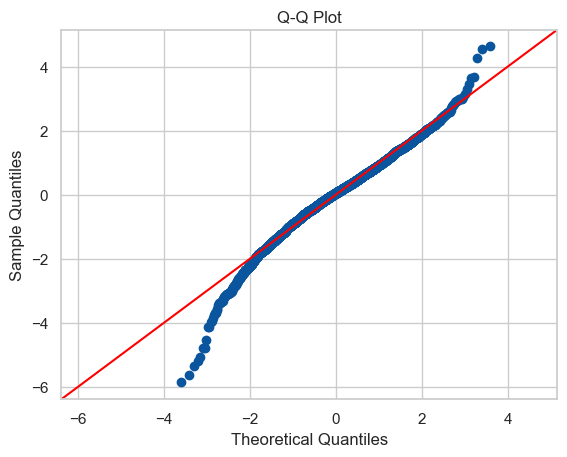

In [44]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

Đa số các điểm trên biểu đồ nằm gần đường chéo, tuy nhiên vẫn còn tương đối các điểm phần bên phải và trái nằm xa đường chéo, cho thấy đa số dữ liệu tuân theo phân phối chuẩn nhưng vẫn có một phần không tuân theo

### Checking for homoscedasticity

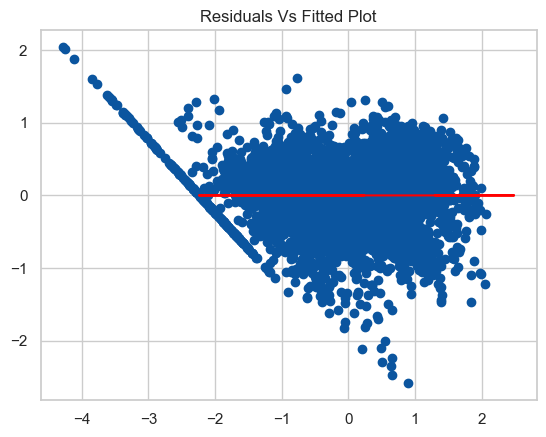

In [45]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

Các điểm trên biểu đồ phân tán tương đối đồng đều quanh đường thẳng 0, cho thấy mô hình không có mẫu sai số dư đáng kể và là mô hình dự đoán tương đối tốt.

## Polynomial Regression 

In [46]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.66%
Model MSE : 11.21%
Cross Val Accuracy: 80.37 %
Cross Val Standard Deviation: 0.47 %


## Decision Tree Regression

In [47]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.42%
Model MSE : 19.36%
Cross Val Accuracy: 80.47 %
Cross Val Standard Deviation: 0.81 %


## Random Forest Regression

In [48]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.40%
Model MSE : 11.47%
Cross Val Accuracy: 88.53 %
Cross Val Standard Deviation: 0.43 %


## Bagging Regressor

In [49]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.30%
Model MSE : 10.58%
Cross Val Accuracy: 89.31 %
Cross Val Standard Deviation: 0.58 %


## Stacking Regressor

In [50]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [51]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.90%
Model MSE : 9.99%
Cross Val Accuracy: 89.74 %
Cross Val Standard Deviation: 0.63 %


## LGBMRegressor

In [52]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model R-Square: {r2_score(y_test, y_pred) * 100:.2f}%")
print(f"Model MSE: {mean_squared_error(y_test, y_pred) * 100:.2f}%")

accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("Cross Val Accuracy: {:.2f}%".format(accuracies.mean() * 100))
print("Cross Val Standard Deviation: {:.2f}%".format(accuracies.std() * 100))

model_comparison['LGBMRegressor'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred),
                                     accuracies.mean(), accuracies.std()]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 6132, number of used features: 39
[LightGBM] [Info] Start training from score 0.000737
Model R-Square: 90.10%
Model MSE: 9.79%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 39
[LightGBM] [Info] Start training from score 0.000032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove th

# Model Comparison

In [53]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
LGBMRegressor,90.10%,9.79%,89.83%,0.61%
Stacking Regressor,89.90%,9.99%,89.74%,0.63%
Bagging Regressor,89.30%,10.58%,89.31%,0.58%
Polynomial Regression,88.66%,11.21%,80.37%,0.47%
Random forest Regression,88.40%,11.47%,88.53%,0.43%
Linear Regression,80.71%,19.08%,80.37%,0.47%
Decision Tree Regression,80.42%,19.36%,80.47%,0.81%


**Nhận xét:** \
**LGBMRegressor** có giá trị **R-Square** cao nhất (90.10%), cho thấy mô hình có khả năng giải thích một phần lớn sự biến động của biến phụ thuộc so với các mô hình khác.\
**Decision Tree Regression** có giá trị **MSE** cao nhất (19.92%), cho thấy mức độ sai lệch trung bình giữa giá trị dự đoán và giá trị thực tế là cao hơn so với các mô hình khác.\
**LGBMRegressor** có giá trị **CV Accuracy** cao nhất (89.83%), cho thấy mô hình này có độ chính xác trung bình cao nhất trong quá trình cross-validation so với các mô hình khác.\
**Stacking Regressor** có giá trị **CV std** cao nhất (5.71%), cho thấy độ biến động của độ chính xác giữa các lần cross-validation là cao hơn so với các mô hình khác.


   Vậy **LGBMRegressor** có giá trị **R-Square cao nhất** (90.10%) và **MSE thấp nhất** (9.79%), cho thấy mô hình này có khả năng giải thích tốt và dự đoán chính xác hơn so với các mô hình khác trong danh sách. Bước tiếp theo, chúng ta sẽ huấn luyện toàn bộ tập dữ liệu bằng mô hình LGBMRegressor

# Huấn luyện toàn bộ dữ liệu bằng LGBMRegressor

In [54]:
lgbm = LGBMRegressor()
lgbm.fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 8760, number of used features: 39
[LightGBM] [Info] Start training from score 0.000000


LGBMRegressor()